In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import gamma

In [2]:
df = pd.read_csv("wine_data.csv",index_col=[0]).dropna(subset=['price'])
# df.head(100)

In [3]:
Q99 = int(df["price"].quantile(0.99))
# print(Q99)
Q10 = int(df["price"].quantile(0.10))

In [4]:
df = df[df['price'] <= Q99]
df = df[df['price'] >= Q10]
df.head(100)

,country,description,designation,points,price,province,region_1,region_2,variety,winery
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude
5,Spain,"Deep, dense and pure from the opening bell, th...",Numanthia,95,73.0,Northern Spain,Toro,NaN,Tinta de Toro,Numanthia
...,...,...,...,...,...,...,...,...,...,...
108,US,"This wine is dry and substantial, emphasizing ...",NaN,86,13.0,California,California,California Other,White Blend,Kitchen Sink
109,US,This is from a hillside estate vineyard and is...,Homestead Block,86,45.0,California,Napa Valley,Napa,Chardonnay,Kuleto Estate
110,Portugal,This state-owned estate of forests and vineyar...,Companhia das Lezírias Herdade de Catapereiro ...,86,12.0,Tejo,NaN,NaN,Portuguese Red,Wines & Winemakers
111,Argentina,This copper-tinted rosé of Pinot Noir smells l...,Terroir Único Pinot Noir,86,12.0,Mendoza Province,Tupungato,NaN,Rosé,Zorzal


Create a new column with price intervals
Count the points in each interval for each point value
Rename the columns to match your desired format
Normalize each column to add up to 100
Fill NaN values with 0

In [5]:
df['price_interval'] = pd.cut(df['price'], bins=np.arange(5*(Q10//5), 5*(Q99//5)+5, 5), right=False)

temp = pd.crosstab(index=df['points'], columns=df['price_interval'])
temp.rows=[i for i in range(0,20)]
temp.columns = ["range"+str(int(b))+"_"+str(int(b)+5) for b in range(5*(Q10//5),5*(Q99//5),5)]
# print(temp)

df = temp.apply(lambda x: (x / x.sum()) * 100, axis=0)
df = df.fillna(0).astype(int)

print(df)

        range10_15  range15_20  range20_25  range25_30  range30_35  \
points                                                               
80               1           0           0           0           0   
81               1           1           1           0           0   
82               4           3           2           2           2   
83               8           5           3           2           2   
84              13           8           7           5           4   
85              15          11           8           7           5   
86              17          14          11          10           8   
87              18          20          17          14          13   
88              10          14          16          15          13   
89               5           7          10          11          11   
90               2           7          11          13          15   
91               0           2           5           7           9   
92               0  

/var/folders/16/2q3nw0ps4mz9nky281dlnzpm0000gn/T/ipykernel_36073/2236638252.py:4: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  temp.rows=[i for i in range(0,20)]


In [6]:
# _ = df.hist(sharex=True, sharey=True, grid=False)
# plt.tight_layout()

In [7]:
df_weight = df.multiply((df.index - 80), axis=0)
print(df_weight)

        range10_15  range15_20  range20_25  range25_30  range30_35  \
points                                                               
80               0           0           0           0           0   
81               1           1           1           0           0   
82               8           6           4           4           4   
83              24          15           9           6           6   
84              52          32          28          20          16   
85              75          55          40          35          25   
86             102          84          66          60          48   
87             126         140         119          98          91   
88              80         112         128         120         104   
89              45          63          90          99          99   
90              20          70         110         130         150   
91               0          22          55          77          99   
92               0  

In [8]:
mean = df_weight.sum()/100
# mean

In [9]:
variance = df.var()
# variance

In [10]:
alpha_mom = (mean**2)/variance
beta_mom = variance/mean
# alpha_mom, beta_mom

In [11]:
setsize="""
axs[0, 0].set_xlim(0, 20)
axs[0, 0].set_ylim(0, 0.5)
"""

List of values for "underX"
Fill in the desired values
Create a figure with subplots

Create a histogram for the current "underX"
 Fit and plot the gamma distribution for the current "underX"
 Annotate with parameter estimates

Set titles for the subplots (underX values)


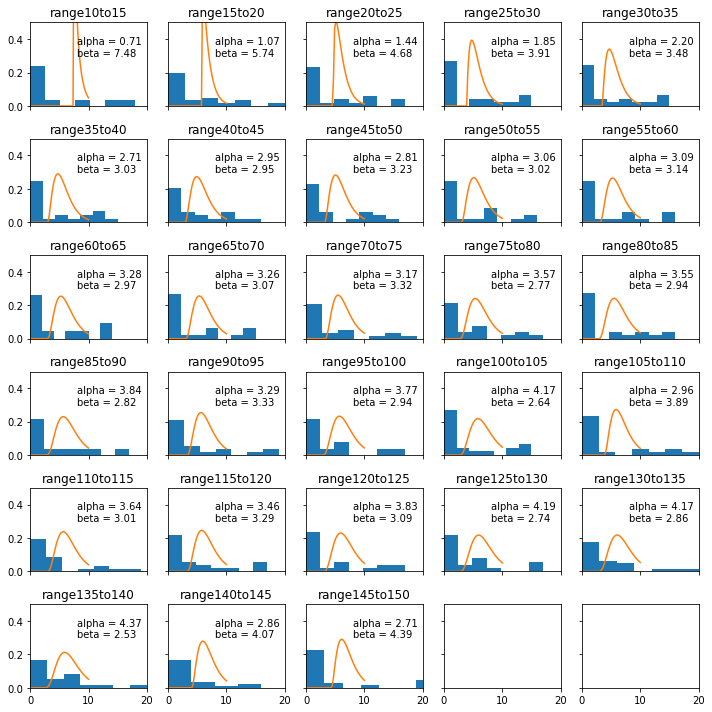

In [12]:
range_values= [i for i in range(5*(Q10//5),5*(Q99//5),5)] 
fig, axs = plt.subplots(6, 5, figsize=(10, 10), sharex=True, sharey=True)


for i, rangeX in enumerate(range_values):
    
    row_idx = i // 5
    col_idx = i % 5

    axs[row_idx, col_idx].hist(df[f'range{rangeX}_{rangeX+5}'], density=True, bins=7)
    axs[row_idx, col_idx].plot(np.linspace(0, 10), gamma.pdf(np.linspace(0, 10), alpha_mom[i], beta_mom[i]))
    if row_idx==0 and col_idx==0: exec(setsize)

    label = 'alpha = {0:.2f}\nbeta = {1:.2f}'.format(alpha_mom[i], beta_mom[i])
    axs[row_idx, col_idx].annotate(label, xy=(8, 0.3))
    axs[row_idx, col_idx].set_title(f'range{rangeX}to{rangeX+5}')

plt.tight_layout()
plt.show()

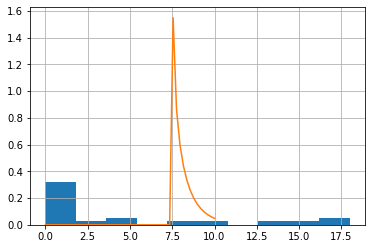

In [13]:
df.range10_15.hist(density=True, bins=10)
plt.plot(np.linspace(0, 10), gamma.pdf(np.linspace(0, 10), alpha_mom[0], beta_mom[0]))

In [14]:
def prediction(price):
    # process int to 5
    price = 5*(price//5)
    x_values = np.linspace(0, 10)
    pdf_values = gamma.pdf(x_values, a=alpha_mom[f'range{price}_{price+5}'], scale=1/beta_mom[f'range{price}_{price+5}'])
    plt.plot(x_values, pdf_values, label=f'{price} Predicted Satisfaction Grade', color='orange')

    # Add labels and title
    plt.xlabel('Grade (scale of 10)')
    plt.ylabel('Probability Density')
    plt.title(f'Predicted Satisfaction Grade Distribution for {price}')

    # Add legend
    plt.legend()
    plt.show()

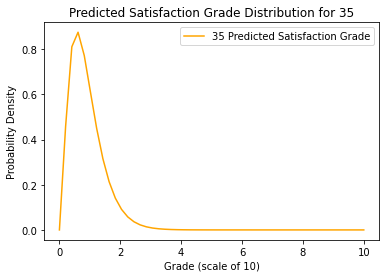

In [15]:
prediction(36)

In [ ]:
import pymc3 as pm
import numpy as np

df_new = pd.read_csv("wine_data.csv").dropna(subset=['price'])
x = df_new['price'].values
y = df_new['points'].values-80

# Model
with pm.Model() as model:
    alpha = pm.Normal('alpha', mu=0, sigma=10, testval=0.0)
    beta = pm.Normal('beta', mu=0, sigma=10, testval=0.0)
    
    sigma = pm.HalfNormal('sigma', sigma=1, testval=1.0)
    
    mu = alpha + beta * x
    
    likelihood = pm.Normal('y', mu=mu, sigma=sigma, observed=y)

with model:
    trace = pm.sample(2000, tune=3000, cores=2, init='auto')

pm.summary(trace)
pm.traceplot(trace)


/Users/yuujadz/opt/anaconda3/lib/python3.9/site-packages/deprecat/classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sigma, beta, alpha]
